# NLP on Covid Narratives using QRMine

## Data
* The dataset used is a collection of 115 interview transcripts available at https://covidstories.omeka.net/
* The narratives have been downloaded to the directory ~/Documents/covid

In [50]:
# First install qrmine
# Uncomment the line below to install qrmine, if not already installed
#!pip install qrmine

# Files in the directory
```bash
ls ~/Documents/covid
```
```text
doc_105.pdf  doc_111.pdf  doc_13.pdf  doc_1.pdf   doc_26.pdf  doc_32.pdf  doc_39.pdf  doc_45.pdf  doc_51.pdf  doc_58.pdf  doc_64.pdf  doc_70.pdf  doc_77.pdf  doc_83.pdf  doc_8.pdf   doc_96.pdf
..           doc_106.pdf  doc_112.pdf  doc_14.pdf  doc_20.pdf  doc_27.pdf  doc_33.pdf  doc_3.pdf   doc_46.pdf  doc_52.pdf  doc_59.pdf  doc_65.pdf  doc_71.pdf  doc_78.pdf  doc_84.pdf  doc_90.pdf  doc_97.pdf
doc_100.pdf  doc_107.pdf  doc_113.pdf  doc_15.pdf  doc_21.pdf  doc_28.pdf  doc_34.pdf  doc_40.pdf  doc_47.pdf  doc_53.pdf  doc_5.pdf   doc_66.pdf  doc_72.pdf  doc_79.pdf  doc_85.pdf  doc_91.pdf  doc_98.pdf
doc_101.pdf  doc_108.pdf  doc_114.pdf  doc_16.pdf  doc_22.pdf  doc_29.pdf  doc_35.pdf  doc_41.pdf  doc_48.pdf  doc_54.pdf  doc_60.pdf  doc_67.pdf  doc_73.pdf  doc_7.pdf   doc_86.pdf  doc_92.pdf  doc_99.pdf
doc_102.pdf  doc_109.pdf  doc_115.pdf  doc_17.pdf  doc_23.pdf  doc_2.pdf   doc_36.pdf  doc_42.pdf  doc_49.pdf  doc_55.pdf  doc_61.pdf  doc_68.pdf  doc_74.pdf  doc_80.pdf  doc_87.pdf  doc_93.pdf  doc_9.pdf
doc_103.pdf  doc_10.pdf   doc_11.pdf   doc_18.pdf  doc_24.pdf  doc_30.pdf  doc_37.pdf  doc_43.pdf  doc_4.pdf   doc_56.pdf  doc_62.pdf  doc_69.pdf  doc_75.pdf  doc_81.pdf  doc_88.pdf  doc_94.pdf
doc_104.pdf  doc_110.pdf  doc_12.pdf   doc_19.pdf  doc_25.pdf  doc_31.pdf  doc_38.pdf  doc_44.pdf  doc_50.pdf  doc_57.pdf  doc_63.pdf  doc_6.pdf   doc_76.pdf  doc_82.pdf  doc_89.pdf  doc_95.pdf
```

In [51]:
# Now let us read the data
import qrmine

# Read the data
corpus = qrmine.ReadData()
words_to_ignore = "interviewee,interviewer,like,go,um,covid,COVID"
corpus.read_file("/home/beapen/Documents/covid/", words_to_ignore)

Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing object 6 0 (offset 0)
Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing obj

In [52]:
# Let us create content processor, nlp processor and clustere processor
content = qrmine.Content()
nlp = qrmine.Qrmine()
cluster = qrmine.ClusterDocs(content)

In [53]:
# Now let us create a coding dictionary with 10 categories
categories = 10
all_interviews = qrmine.Content(corpus.content, corpus.titles)
nlp.print_dict(all_interviews, categories)


---Coding Dictionary---
| CATEGORY | PROPERTY   | DIMENSION  |
| go       | time       | spend      |
| ...      | life       | ongoing    |
| ...      | thing      | kind       |
| ...      | factor     | ongoing    |
| ...      | ...        | final      |
| ...      | ...        | big        |
| know     | time       | spend      |
| ...      | thing      | kind       |
| ...      | life       | ongoing    |
| think    | moment     | key        |
| ...      | ...        | stand      |
| ...      | ...        | stay       |
| ...      | ...        | share      |
| ...      | memory     | key        |
| ...      | ...        | stand      |
| ...      | ...        | stay       |
| ...      | ...        | explain    |
| ...      | time       | spend      |
| ...      | thing      | kind       |
| get      | time       | spend      |
| ...      | thing      | kind       |
| feel     | time       | spend      |
| ...      | thing      | kind       |
| ...      | life       | ongoing    |


In [54]:
# Now let us generate topics with LDA
cluster.documents = corpus.documents
cluster.titles = corpus.titles
topics = cluster.print_topics()


Topics: 

Topic 0: "think"(0.020), "go"(0.017), "time"(0.017), "people"(0.015), "get"(0.013)
Topic 1: "know"(0.021), "people"(0.019), "time"(0.017), "experience"(0.015), "go"(0.014)
Topic 2: "go"(0.015), "time"(0.012), "work"(0.012), "get"(0.011), "home"(0.009)
Topic 3: "people"(0.018), "go"(0.017), "know"(0.015), "yeah"(0.014), "get"(0.011)
Topic 4: "go"(0.018), "think"(0.017), "get"(0.016), "know"(0.015), "time"(0.014)


In [55]:
# Let us see the documents belonging to each topic
cluster.print_clusters()


 Main topic in doc: 

Document doc_114.pdf belongs to topic: [(0, 0.07837789), (4, 0.9182373)]
Document doc_89.pdf belongs to topic: [(0, 0.28849232), (1, 0.23507732), (2, 0.34450918), (4, 0.13132164)]
Document doc_61.pdf belongs to topic: [(1, 0.6740575), (4, 0.32362968)]
Document doc_55.pdf belongs to topic: [(1, 0.9968047)]
Document doc_12.pdf belongs to topic: [(1, 0.4913659), (4, 0.5057588)]
Document doc_77.pdf belongs to topic: [(0, 0.99908847)]
Document doc_91.pdf belongs to topic: [(0, 0.25024801), (1, 0.11914682), (3, 0.6301373)]
Document doc_9.pdf belongs to topic: [(1, 0.99644494)]
Document doc_23.pdf belongs to topic: [(4, 0.9982503)]
Document doc_20.pdf belongs to topic: [(1, 0.99921286)]
Document doc_106.pdf belongs to topic: [(0, 0.017260987), (1, 0.98170173)]
Document doc_56.pdf belongs to topic: [(0, 0.43165916), (1, 0.013939194), (2, 0.5537415)]
Document doc_41.pdf belongs to topic: [(1, 0.2729206), (4, 0.7262154)]
Document doc_107.pdf belongs to topic: [(0, 0.564246

In [56]:
# Format
df_dominant_topic = cluster.format_topics_sentences(visualize=True)
# # Format the output
df_dominant_topic.columns = [
    "Document_No",
    "Title",
    "Dominant_Topic",
    "Topic_Perc_Contrib",
    "Keywords",
    "Text",
]
print(df_dominant_topic.head(10))

   Document_No        Title  Dominant_Topic  Topic_Perc_Contrib  \
0            0  doc_114.pdf               4              0.9188   
1            1   doc_89.pdf               2              0.3447   
2            2   doc_61.pdf               1              0.6736   
3            3   doc_55.pdf               1              0.9968   
4            4   doc_12.pdf               4              0.5066   
5            5   doc_77.pdf               0              0.9991   
6            6   doc_91.pdf               3              0.6298   
7            7    doc_9.pdf               1              0.9964   
8            8   doc_23.pdf               4              0.9983   
9            9   doc_20.pdf               1              0.9992   

                                            Keywords  \
0  go, think, get, know, time, experience, mask, ...   
1  go, time, work, get, home, experience, day, co...   
2  know, people, time, experience, go, think, lot...   
3  know, people, time, experience, go,

In [57]:
# And the most representative document for each topic
df_sorted = cluster.most_representative_docs()
print(df_sorted.head(10))

     index       Title  Dominant_Topic  Perc_Contribution  \
60      60  doc_49.pdf               0             0.9995   
80      80  doc_68.pdf               1             0.9995   
39      39   doc_8.pdf               2             0.9995   
109    109  doc_70.pdf               3             0.9996   
15      15   doc_6.pdf               4             0.9997   

                                        Topic_Keywords  
60   think, go, time, people, get, know, experience...  
80   know, people, time, experience, go, think, lot...  
39   go, time, work, get, home, experience, day, co...  
109  people, go, know, yeah, get, feel, thing, thin...  
15   go, think, get, know, time, experience, mask, ...  


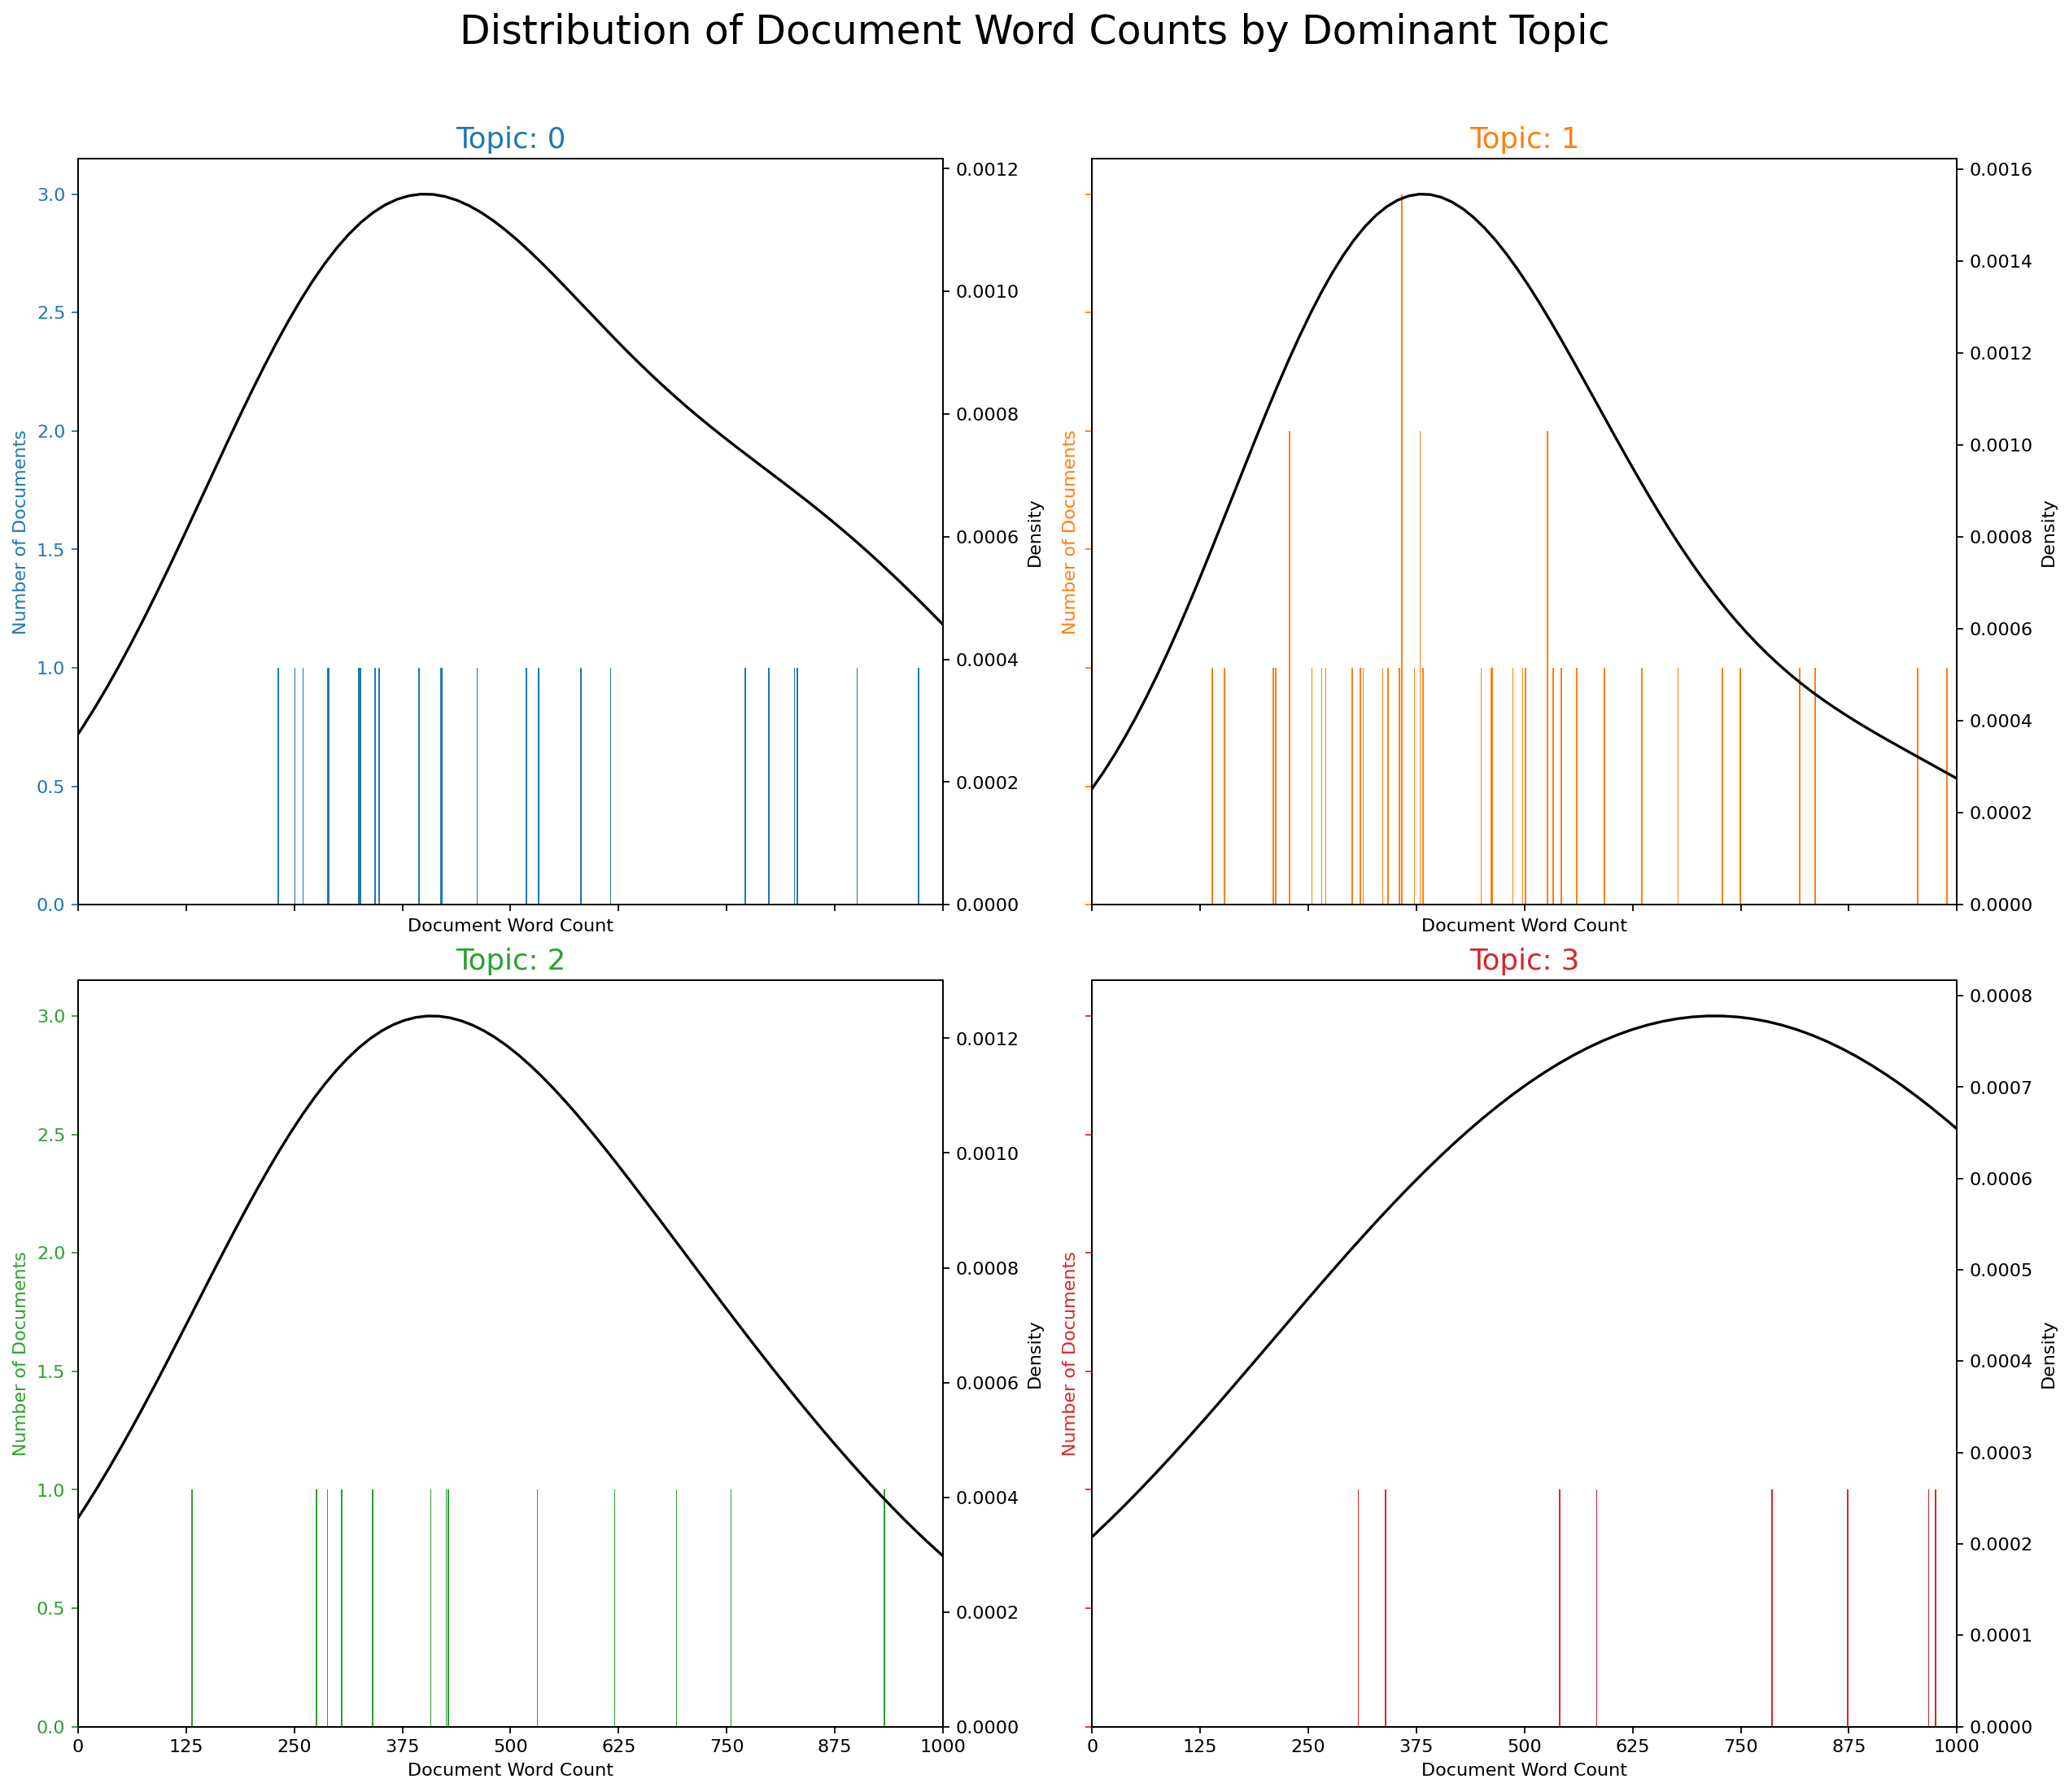

In [58]:
# Now let us visualize the frequency distribution of words
v = qrmine.QRVisualize(df_dominant_topic)
v.plot_distribution_by_topic()

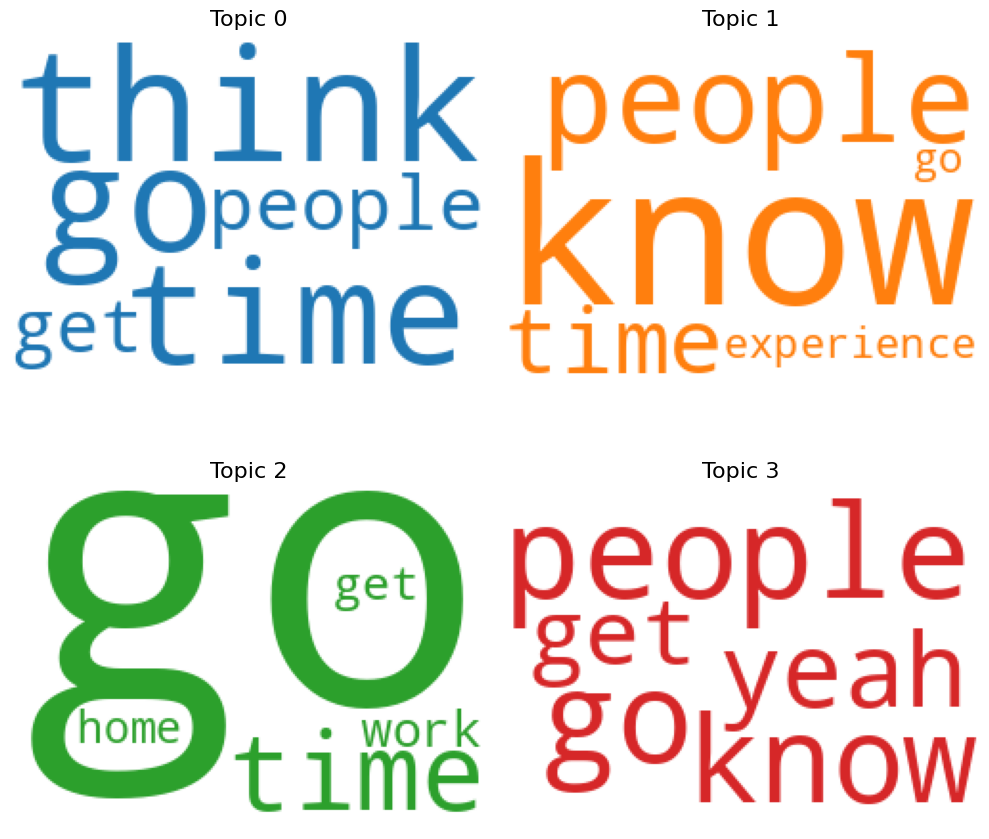

In [59]:
topics = cluster.build_lda_model()
v.plot_wordcloud(topics=topics)

Averaged text w2v representstion:
[-0.09325517 -0.02984254 -0.1306952   0.11801773 -0.05594118 -0.01492127
  0.03423265  0.15386842 -0.17253786  0.04829215  0.15110265  0.00429021
 -0.09204374 -0.02438161  0.17355703 -0.16656011  0.12591307  0.27858827
 -0.20589662 -0.14679371  0.16028833 -0.05966273  0.15236427 -0.03335076
 -0.00772867  0.00404334  0.02276393  0.16588259 -0.21755295 -0.17613636
  0.07655615  0.15233618  0.09671395  0.2040442  -0.14392485 -0.18354562
  0.19768122 -0.08526665  0.14841193 -0.00843883 -0.39191473  0.10316198
 -0.30269215 -0.35406     0.11237023  0.176387   -0.12062275 -0.06821962
  0.31810373 -0.23463763]
(115, 50)
+------------+------------+----------+-------------+
| x          | y          | colour   | title       |
|------------+------------+----------+-------------|
| -0.268001  | -10.0022   | 1        | doc_114.pdf |
| 4.211      | -7.42706   | 3        | doc_89.pdf  |
| 5.46644    | -2.80259   | 0        | doc_61.pdf  |
| -2.58261   | -0.222586  | 

<Figure size 600x600 with 0 Axes>

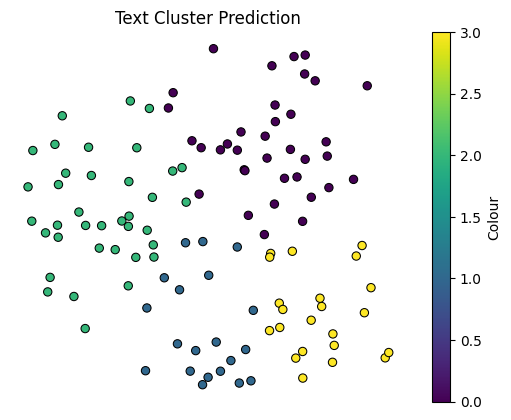

In [60]:
data = cluster.vectorizer(docs=corpus.documents, titles=corpus.titles)
v.cluster_chart(data)